# **Import the required libraries and load the dataset.**

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [169]:
df=pd.read_csv('Housing.csv')

# **Initiate basic exploration.**

In [170]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [172]:
df['price'].max()


13300000

In [173]:
df['price'].min()

1750000

In [181]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


# **Encode each categorical column in the df with numeric vals.**

In [174]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


# **Apply log transform for handling skewness and to reduce the influence of outliers.**

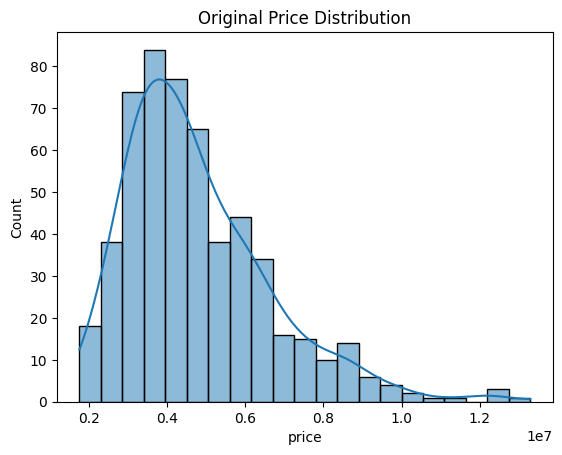

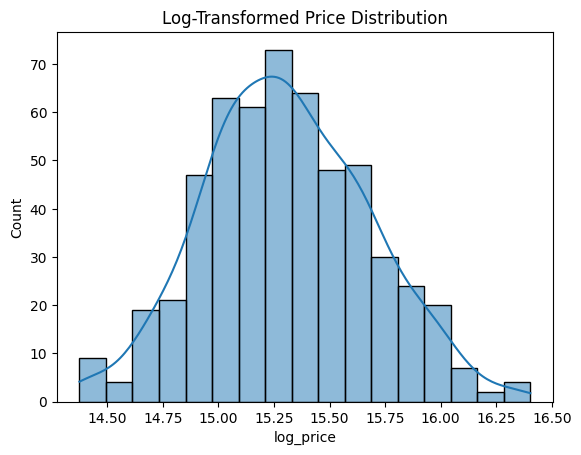

In [185]:
# Visualizing original price distribution
sns.histplot(df['price'], kde=True)
plt.title("Original Price Distribution")
plt.show()

# Visualizing log-transformed price distribution
sns.histplot(df['log_price'], kde=True)
plt.title("Log-Transformed Price Distribution")
plt.show()


In [175]:
# Applying log transform for better linearity and modelling
df['log_price'] = np.log1p(df['price'])
df['log_airconditioning']= np.log1p(df['airconditioning'])
df['log_basement']= np.log1p(df['basement'])
df['log_parking']= np.log1p(df['parking'])
df['log_prefarea']= np.log1p(df['prefarea'])
df['log_stories']= np.log1p(df['stories'])
df['log_mainroad']= np.log1p(df['mainroad'])
df['log_guestroom']= np.log1p(df['guestroom'])
df['log_bathrooms']= np.log1p(df['bathrooms'])
df['log_bedrooms']= np.log1p(df['bedrooms'])
df['log_hotwaterheating']= np.log1p(df['hotwaterheating'])
df['log_furnishingstatus']= np.log1p(df['furnishingstatus'])
df['log_area']= np.log1p(df['area'])



# **Define X, Y and split the dataset into training and testing sets.**

In [184]:
X = df[['log_airconditioning', 'log_stories','log_bathrooms', 'log_furnishingstatus', 'log_area']]
y = df['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [178]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [179]:
y_pred=model.predict(X_test)

# **Evaluate model with necessary metrics(here, MAE, MSE, R2).**

In [180]:
# Calculating mean absolute error, mean squared error and r sqaured for  evaluating model's performance
mae = mean_absolute_error(y_test, y_pred) # Lower value indicate better performance
mse = mean_squared_error(y_test, y_pred) # Value close to 0 indicate better performance
r2 = r2_score(y_test, y_pred) # Value close to 1 indicate better performance

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

MAE: 0.17095328831048168
MSE: 0.047776224814105456
R² Score: 0.6606895388477403


# **Plot regression line and interpret coefficients.**

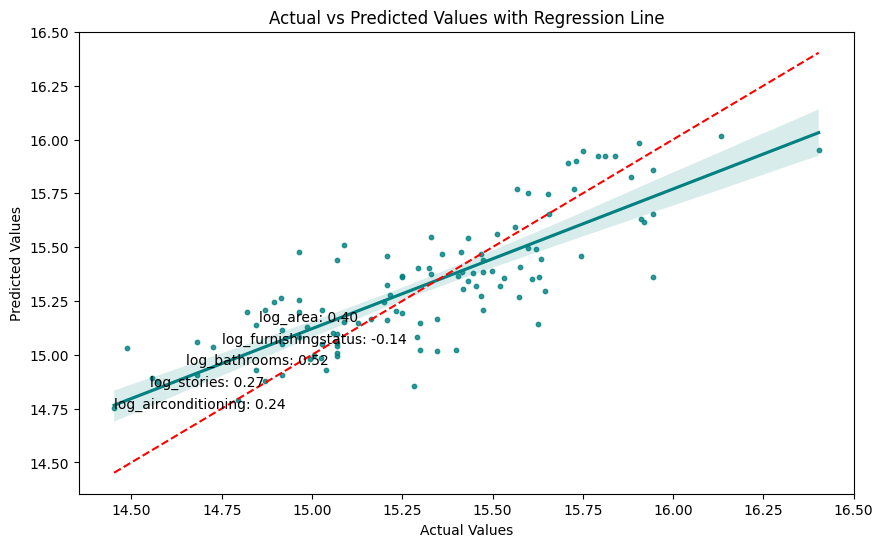

Coefficients:
                Feature  Coefficient
0   log_airconditioning     0.238723
1           log_stories     0.265788
2         log_bathrooms     0.522086
3  log_furnishingstatus    -0.140414
4              log_area     0.398827

Interpretation of Coefficients:
A one unit increase in 'log_airconditioning' is associated with a 0.24 unit change in 'log_price'.
A one unit increase in 'log_stories' is associated with a 0.27 unit change in 'log_price'.
A one unit increase in 'log_bathrooms' is associated with a 0.52 unit change in 'log_price'.
A one unit increase in 'log_furnishingstatus' is associated with a -0.14 unit change in 'log_price'.
A one unit increase in 'log_area' is associated with a 0.40 unit change in 'log_price'.


In [167]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, color='teal', scatter_kws={'s': 10})  # Increased scatter point size

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Regression Line')
# Annotate coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
for i, coef in enumerate(model.coef_):
  plt.annotate(f'{X.columns[i]}: {coef:.2f}', (y_test.min() + (i * 0.1), y_pred.min() + (i * 0.1)), color='black')
plt.show()

# Interpretation of coefficients
print("Coefficients:")
print(coefficients)
print("\nInterpretation of Coefficients:")
for index, row in coefficients.iterrows():
    print(f"A one unit increase in '{row['Feature']}' is associated with a {row['Coefficient']:.2f} unit change in 'log_price'.")
